# Eda On Dengue Dataset

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)

### Let's load data into dataframe

In [4]:
df = pd.read_csv('../data/raw_data/dengue.csv')
df.head()

,dengue.p_i_d,dengue.date_of_fever,dengue.residence,dengue.days,dengue.current_temp,dengue.wbc,dengue.servere_headche,dengue.pain_behind_the_eyes,dengue.joint_muscle_aches,dengue.metallic_taste_in_the_mouth,dengue.appetite_loss,dengue.addominal_pain,dengue.nausea_vomiting,dengue.diarrhoea,dengue.hemoglobin,dengue._hematocri,dengue.platelet,dengue.dengue
0,P012,13-Jan,Bangalore,10 days,100.0,5.0,yes,no,no,yes,yes,yes,no,yes,15.0,NaN,140.0,yes
1,P011,13-Feb,New Delhi,4 days,104.0,1.0,no,yes,yes,no,no,no,no,no,9.0,22.0,80.0,no
2,P010,9-Jan,Jamica,5 days,104.0,5.0,NaN,no,no,yes,yes,yes,yes,no,NaN,NaN,120.0,yes
3,P009,12-Aug,Barbados,12 months,101.0,NaN,yes,yes,no,no,no,no,no,no,NaN,NaN,NaN,no
4,P008,12-Oct,St.Martin,3 days,101.0,NaN,yes,no,no,no,no,no,yes,no,NaN,NaN,NaN,no


In [5]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   dengue.p_i_d                        108 non-null    object 
 1   dengue.date_of_fever                108 non-null    object 
 2   dengue.residence                    108 non-null    object 
 3   dengue.days                         99 non-null     object 
 4   dengue.current_temp                 108 non-null    float64
 5   dengue.wbc                          45 non-null     float64
 6   dengue.servere_headche              90 non-null     object 
 7   dengue.pain_behind_the_eyes         108 non-null    object 
 8   dengue.joint_muscle_aches           99 non-null     object 
 9   dengue.metallic_taste_in_the_mouth  108 non-null    object 
 10  dengue.appetite_loss                108 non-null    object 
 11  dengue.addominal_pain               108 non-n

((108, 18), None)

### Let's find the missing values in data

In [7]:
for feature in df.columns:
    print(f'{feature}  has {df[feature].isnull().mean() * 100}% null values') 

dengue.p_i_d  has 0.0% null values
dengue.date_of_fever  has 0.0% null values
dengue.residence  has 0.0% null values
dengue.days  has 8.333333333333332% null values
dengue.current_temp  has 0.0% null values
dengue.wbc  has 58.333333333333336% null values
dengue.servere_headche  has 16.666666666666664% null values
dengue.pain_behind_the_eyes  has 0.0% null values
dengue.joint_muscle_aches  has 8.333333333333332% null values
dengue.metallic_taste_in_the_mouth  has 0.0% null values
dengue.appetite_loss  has 0.0% null values
dengue.addominal_pain  has 0.0% null values
dengue.nausea_vomiting  has 0.0% null values
dengue.diarrhoea  has 0.0% null values
dengue.hemoglobin  has 66.66666666666666% null values
dengue._hematocri  has 75.0% null values
dengue.platelet  has 50.0% null values
dengue.dengue  has 8.333333333333332% null values


Acc to above abservation there are some null values which will resolved in feature engineering

### Let's find the numerical features in data

In [12]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
df[num_features].head()

,dengue.current_temp,dengue.wbc,dengue.hemoglobin,dengue._hematocri,dengue.platelet
0,100.0,5.0,15.0,NaN,140.0
1,104.0,1.0,9.0,22.0,80.0
2,104.0,5.0,NaN,NaN,120.0
3,101.0,NaN,NaN,NaN,NaN
4,101.0,NaN,NaN,NaN,NaN


### Now let's find the categorical features in data

In [14]:
cate_features = [feature for feature in df.columns if df[feature].dtype == 'O']
df[cate_features].head()

,dengue.p_i_d,dengue.date_of_fever,dengue.residence,dengue.days,dengue.servere_headche,dengue.pain_behind_the_eyes,dengue.joint_muscle_aches,dengue.metallic_taste_in_the_mouth,dengue.appetite_loss,dengue.addominal_pain,dengue.nausea_vomiting,dengue.diarrhoea,dengue.dengue
0,P012,13-Jan,Bangalore,10 days,yes,no,no,yes,yes,yes,no,yes,yes
1,P011,13-Feb,New Delhi,4 days,no,yes,yes,no,no,no,no,no,no
2,P010,9-Jan,Jamica,5 days,NaN,no,no,yes,yes,yes,yes,no,yes
3,P009,12-Aug,Barbados,12 months,yes,yes,no,no,no,no,no,no,no
4,P008,12-Oct,St.Martin,3 days,yes,no,no,no,no,no,yes,no,no


As above observation p_i_d ,days,date_of_fever not require for prediction so we will drop it

### Let's check outiers in num features

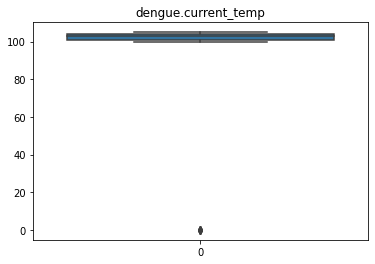

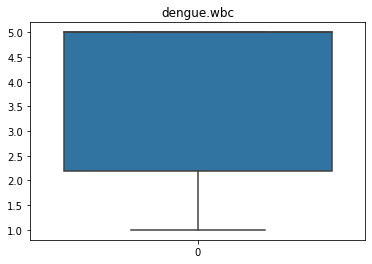

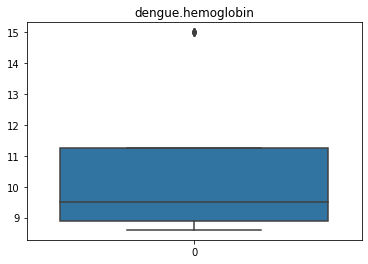

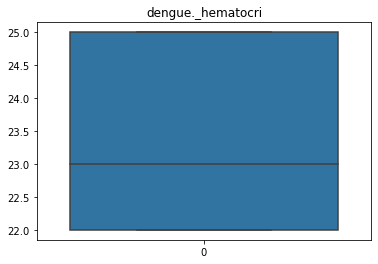

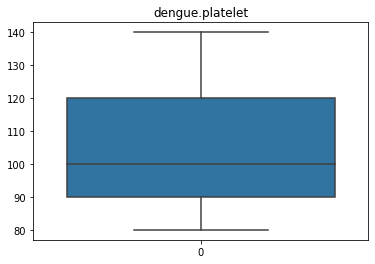

In [24]:
for feature in num_features:
    sns.boxplot(data=df[feature])
    plt.title(feature)
    plt.show()

As above observation there is no kind od ouliers

### So from analysis we have to do in feature engineering that is
1. Changing feature names for simplicity
2. Handle missing values
3. Drop unnecessary features
4. Encode categorical features
5. Save cooked data into file for further work